# EDA - Bankrupt Detection Analysis

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
## lets read the dataset first
input_dir = '../../data/raw/'

data = pd.read_csv(input_dir + 'data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [3]:
#@ lets send Bankrupt? variable to be categorical
data['Bankrupt?'] = data['Bankrupt?'].astype('category')

In [4]:
## lets strip all column names
data.columns = data.columns.str.strip()

In [5]:
data.shape

(6819, 96)

In [6]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [7]:
data.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   Bankrupt?                                                6819 non-null   category
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64 
 2   ROA(A) before interest and % after tax                   6819 non-null   float64 
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64 
 4   Operating Gross Margin                                   6819 non-null   float64 
 5   Realized Sales Gross Margin                              6819 non-null   float64 
 6   Operating Profit Rate                                    6819 non-null   float64 
 7   Pre-tax net Interest Rate                                6819 non-null   float64 
 8   After-tax net Inte

In [9]:
## lets do value ccounts for Bankrupt?
data['Bankrupt?'].value_counts()


Bankrupt?
0    6599
1     220
Name: count, dtype: int64

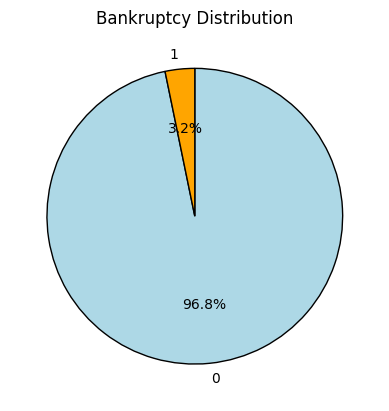

In [10]:
data['Bankrupt?'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['lightblue', 'orange'],  # Your preferred colors
    startangle=90,
    counterclock=False,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.title('Bankruptcy Distribution')
plt.ylabel('')  # This removes the y-axis label

# Show the plot
plt.show()

<Axes: xlabel='Bankrupt?'>

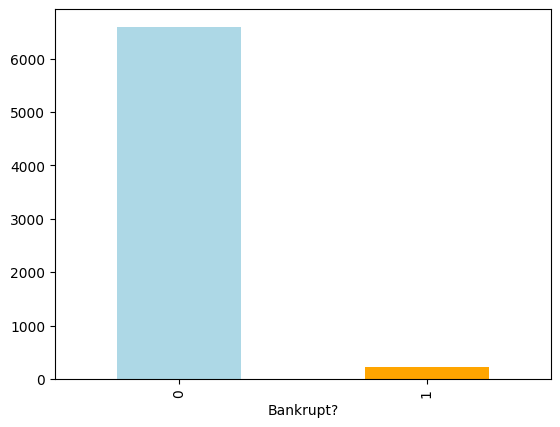

In [11]:
## generate a barplot too
data['Bankrupt?'].value_counts().plot(kind='bar', color = ['lightblue', 'orange'])

In [12]:
## lets describe the data
data.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672

In [13]:
corr_matrix = data.corr()

corr_matrix  

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.036820,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,0.176543,0.070455,-0.141111,-0.207857,0.075278,-0.067915,-0.004754,-0.006556,-0.001376,0.072818,0.021089,0.039718,-0.092842,0.002829,-0.193083,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.26

In [14]:
import pandas as pd
from scipy.stats import pointbiserialr

# Load the data
input_dir = '../../data/raw/'
data = pd.read_csv(input_dir + 'data.csv')

# Convert 'Bankrupt?' to categorical
data['Bankrupt?'] = data['Bankrupt?'].astype('category')

# Calculate point biserial correlation
correlations = {}
for column in data.columns:
    if data[column].dtype != 'category' and data[column].dtype != 'object':
        corr, _ = pointbiserialr(data['Bankrupt?'].cat.codes, data[column])
        correlations[column] = corr

# Convert to DataFrame for easy viewing
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Point Biserial Correlation'])
correlation_df = correlation_df.sort_values(by='Point Biserial Correlation', ascending=False)
correlation_df


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


,Variable,Point Biserial Correlation
36,Debt ratio %,0.250161
59,Current Liability to Assets,0.194494
39,Borrowing dependency,0.176543
83,Current Liability to Current Assets,0.171306
90,Liability to Equity,0.166812
77,Current Liability to Equity,0.153828
65,Current Liabilities/Equity,0.153828
84,Liability-Assets Flag,0.139212
69,Total expense/Assets,0.139049
78,Equity to Long-term Liability,0.139014


In [15]:
correlation_df["Absolute Point Biserial Correlation"] = correlation_df["Point Biserial Correlation"].abs()
correlation_df = correlation_df.sort_values(by='Absolute Point Biserial Correlation', ascending=False)
correlation_df

,Variable,Point Biserial Correlation,Absolute Point Biserial Correlation
85,Net Income to Total Assets,-0.315457,0.315457
1,ROA(A) before interest and % after tax,-0.282941,0.282941
2,ROA(B) before interest and depreciation after...,-0.273051,0.273051
0,ROA(C) before interest and depreciation befor...,-0.260807,0.260807
36,Debt ratio %,0.250161,0.250161
37,Net worth/Assets,-0.250161,0.250161
18,Persistent EPS in the Last Four Seasons,-0.219560,0.219560
67,Retained Earnings to Total Assets,-0.217779,0.217779
42,Net profit before tax/Paid-in capital,-0.207857,0.207857
22,Per Share Net profit before tax (Yuan ¥),-0.201395,0.201395


In [16]:
## lets save the correlation with bankrupt to a csv file

table_directory = '../../reports/tables/'   

correlation_df.to_csv(table_directory + 'correlation_with_bankrupt.csv')

In [22]:
#Print the column names
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [23]:
data[" Net Income Flag"].value_counts()

 Net Income Flag
1    6819
Name: count, dtype: int64

In [24]:
# Net income Flag is 1 for all so it is not useful lets drop it
data = data.drop(columns=[" Net Income Flag"])

In [25]:

#Drop the rows from correlation_df with absolute correlation less than 0.1
correlation_df = correlation_df[correlation_df["Absolute Point Biserial Correlation"] > 0.1]

#Print the correlation_df
correlation_df


,Variable,Point Biserial Correlation,Absolute Point Biserial Correlation
85,Net Income to Total Assets,-0.315457,0.315457
1,ROA(A) before interest and % after tax,-0.282941,0.282941
2,ROA(B) before interest and depreciation after...,-0.273051,0.273051
0,ROA(C) before interest and depreciation befor...,-0.260807,0.260807
36,Debt ratio %,0.250161,0.250161
37,Net worth/Assets,-0.250161,0.250161
18,Persistent EPS in the Last Four Seasons,-0.219560,0.219560
67,Retained Earnings to Total Assets,-0.217779,0.217779
42,Net profit before tax/Paid-in capital,-0.207857,0.207857
22,Per Share Net profit before tax (Yuan ¥),-0.201395,0.201395


In [31]:
#Print the variable from correlation_df
correlation_df["Variable"]

85                           Net Income to Total Assets
1                ROA(A) before interest and % after tax
2      ROA(B) before interest and depreciation after...
0      ROA(C) before interest and depreciation befor...
36                                         Debt ratio %
37                                     Net worth/Assets
18              Persistent EPS in the Last Four Seasons
67                    Retained Earnings to Total Assets
42                Net profit before tax/Paid-in capital
22             Per Share Net profit before tax (Yuan ¥)
59                          Current Liability to Assets
53                      Working Capital to Total Assets
89                   Net Income to Stockholder's Equity
39                                 Borrowing dependency
83                  Current Liability to Current Assets
90                                  Liability to Equity
16                              Net Value Per Share (A)
15                              Net Value Per Sh

In [32]:
#Append the target variable to the final_cols
final_cols = correlation_df["Variable"].tolist()
final_cols.append("Bankrupt?")
final_cols

[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Current Liability to Assets',
 ' Working Capital to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Borrowing dependency',
 ' Current Liability to Current Assets',
 ' Liability to Equity',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (C)',
 ' Current Liability to Equity',
 ' Current Liabilities/Equity',
 ' Working Capital/Equity',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Operating profit/Paid-in capital',
 ' Liability-Assets Flag',
 ' Total expense/Assets',
 ' Equity to Long-term Liability',
 ' CFO to Assets',
 ' Tax rate (A)',
 ' Cash/T

In [34]:
#Create a copy of the data
data_copy = data.copy()

#Keep only the columns in final_cols in the data
data_copy = data_copy[final_cols]

#Print the data
data_copy.head()

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Debt ratio %,Net worth/Assets,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥),Current Liability to Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Net Value Per Share (A),Net Value Per Share (B),Net Value Per Share (C),Current Liability to Equity,Current Liabilities/Equity,Working Capital/Equity,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,Liability-Assets Flag,Total expense/Assets,Equity to Long-term Liability,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales,Operating Gross Margin,Bankrupt?
0,0.716845,0.424389,0.405750,0.370594,0.207576,0.792424,0.169141,0.903225,0.137757,0.138736,0.147308,0.672775,0.827890,0.390284,0.118250,0.290202,0.147950,0.147950,0.147950,0.339077,0.339077,0.721275,0.095921,0.095885,0,0.064856,0.126549,0.520382,0.0,0.004094,0.601453,0.601457,1
1,0.795297,0.538214,0.516730,0.464291,0.171176,0.828824,0.208944,0.931065,0.168962,0.169918,0.056963,0.751111,0.839969,0.376760,0.047775,0.283846,0.182251,0.182251,0.182251,0.329740,0.329740,0.731975,0.093722,0.093743,0,0.025516,0.120916,0.567101,0.0,0.014948,0.610237,0.610235,1
2,0.774670,0.499019,0.472295,0.426071,0.207516,0.792484,0.180581,0.909903,0.148036,0.142803,0.098162,0.829502,0.836774,0.379093,0.025346,0.290189,0.177911,0.177911,0.193713,0.334777,0.334777,0.742729,0.092338,0.092318,0,0.021387,0.117922,0.538491,0.0,0.000991,0.601449,0.601450,1
3,0.739555,0.451265,0.457733,0.399844,0.151465,0.848535,0.193722,0.906902,0.147561,0.148603,0.098715,0.725754,0.834697,0.379743,0.067250,0.281721,0.154187,0.154187,0.154187,0.331509,0.331509,0.729825,0.077762,0.077727,0,0.024161,0.120760,0.604105,0.0,0.018851,0.583538,0.583541,1
4,0.795016,0.538432,0.522298,0.465022,0.106509,0.893491,0.212537,0.913850,0.167461,0.168412,0.110195,0.751822,0.839973,0.375025,0.047725,0.278514,0.167502,0.167502,0.167502,0.330726,0.330726,0.732000,0.096898,0.096927,0,0.026385,0.110933,0.578469,0.0,0.014161,0.598782,0.598783,1


In [36]:
#Save the data_copy to a csv file
data_copy.to_csv('../../data/raw/cleaned_data.csv', index=False)